## Using Random Forest to understand the relationship between AFL audiences on FTA and Pay TV

In [1]:
# load in libraries

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# load the csv
audience = pd.read_csv('AFL_audience.csv')

In [9]:
# check out the dataframe
audience.head(5)

,Match ID,TEAM 1,TEAM 2,TYPE,Market,Exclusive,FTA,PAY
0,1,RICHMOND,CARLTON,STANDARD,5 City Metro,0,611000,225000
1,1,RICHMOND,CARLTON,STANDARD,Adelaide,0,86000,30000
2,1,RICHMOND,CARLTON,STANDARD,Brisbane,0,30000,22000
3,1,RICHMOND,CARLTON,STANDARD,Melbourne,0,388000,127000
4,1,RICHMOND,CARLTON,STANDARD,Perth,0,79000,26000


In [4]:
# drop columns that won't really do anything in the model

audience.drop(columns = ['Date'], inplace=True)

### First model will use just 5 City Metro totals

In [10]:
audience_metro = audience.loc[audience['Market'] == '5 City Metro']
audience_metro = audience_metro.loc[audience['Exclusive'] == 0]
audience_metro = audience_metro.loc[audience['TYPE'] != 'GRAND FINAL']

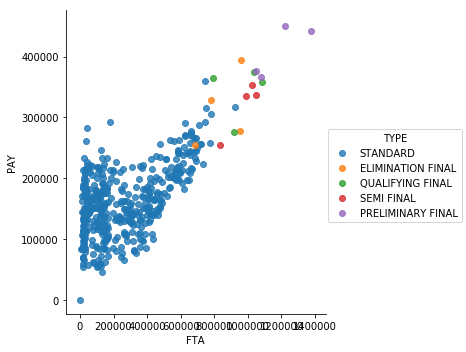

In [11]:
# let's try out a scatter
sb.lmplot( x='FTA', y='PAY', data=audience_metro, fit_reg=False, hue='TYPE', legend=True)

In [12]:
# create dummary variables for teams
# this will require creating a dummy table for team 1 and team 2 and then adding one on top of the other
dummies_1 = pd.get_dummies(audience_metro['TEAM 1'])

In [13]:
dummies_2 = pd.get_dummies(audience_metro['TEAM 2'])

In [14]:
dummies_1.head(1)

,ADELAIDE,BRISBANE,BULLDOGS,CARLTON,COLLINGWOOD,ESSENDON,FREMANTLE,GEELONG,GOLD COAST,GWS,HAWTHORN,MELBOURNE,NORTH MELBOURNE,PORT ADELAIDE,RICHMOND,ST KILDA,SYDNEY,WEST COAST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
dummies_2.head(1)

,ADELAIDE,BRISBANE,BULLDOGS,CARLTON,COLLINGWOOD,ESSENDON,FREMANTLE,GEELONG,GOLD COAST,GWS,HAWTHORN,MELBOURNE,NORTH MELBOURNE,PORT ADELAIDE,RICHMOND,ST KILDA,SYDNEY,WEST COAST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
dummies = dummies_2 + dummies_1

In [19]:
audience_metro = audience_metro.join(dummies)

In [20]:
audience_metro.head(5)

,Match ID,TEAM 1,TEAM 2,TYPE,Market,Exclusive,FTA,PAY,ADELAIDE,BRISBANE,...,GOLD COAST,GWS,HAWTHORN,MELBOURNE,NORTH MELBOURNE,PORT ADELAIDE,RICHMOND,ST KILDA,SYDNEY,WEST COAST
0,1,RICHMOND,CARLTON,STANDARD,5 City Metro,0,611000,225000,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2,GOLD COAST,ESSENDON,STANDARD,5 City Metro,0,21000,184000,0,0,...,1,0,0,0,0,0,0,0,0,0
12,3,MELBOURNE,GWS,STANDARD,5 City Metro,0,28000,209000,0,0,...,0,1,0,1,0,0,0,0,0,0
18,4,NORTH MELBOURNE,ADELAIDE,STANDARD,5 City Metro,0,144000,135000,1,0,...,0,0,0,0,1,0,0,0,0,0
24,5,SYDNEY,COLLINGWOOD,STANDARD,5 City Metro,0,412000,151000,0,0,...,0,0,0,0,0,0,0,0,1,0
